# Clustering


Wikipedia: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

## K-means

Source: C. M. Bishop *Pattern Recognition and Machine Learning*, Springer, 2006

Suppose we have a data set $X = \{x_1 , \cdots , x_N\}$ consisting of $N$ observations of a random $D$-dimensional Euclidean variable $x$. Our goal is to partition the data set into some number $K$ of clusters, where we shall suppose for the moment that the value of $K$ is given. Intuitively, we might think of a cluster as comprising a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster. We can formalize this notion by first introducing a set of D-dimensional vectors $\mu_k , where $k = 1, \cdots , K$, in which $\mu_k$ is a **prototype$ associated with the $k^{th}$ cluster. As we shall see shortly, we can think of the $\mu_k$ as representing the centres of the clusters. Our goal is then to find an assignment of data points to clusters, as well as a set of vectors $\{\mu_k\}$, such that the sum of the squares of the distances of each data point to its closest vector $\mu_k$ , is a minimum.

It is convenient at this point to define some notation to describe the assignment of data points to clusters. For each data point $x_i$ , we introduce a corresponding set of binary indicator variables $r_{ik} \in \{0, 1\}$, where $k = 1, \cdots , K$ describing which of the $K$ clusters the data point $x_i$ is assigned to, so that if data point $x_i$ is assigned to cluster $k$ then $r_{ik} = 1$, and $r_{ij} = 0$ for $j \neq k$. This is known as the 1-of-$K$ coding scheme. We can then define an objective function, **inertia**, given by

$$
J = \sum_i^N \sum_k^K r_{ik} ||x_i - \mu_k||^2
$$
which represents the sum of the squares of the distances of each data point to its assigned vector $\mu_k$ . Our goal is to find values for the {$r_{ik}$} and the {$\mu_k$ } so as to minimize J. We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the $r_{ik}$ and the $\mu_k$ . First we choose some initial values for the $\mu_k$ . Then in the first phase we minimize J with respect to the $r_{ik}$ , keeping the $\mu_k$ fixed. In the second phase we minimize J with respect to the $\mu_k$ , keeping $r_{ik}$ fixed. This two-stage optimization is then repeated until convergence. We shall see that these two stages of updating $r_{ik}$ and updating $\mu_k$ correspond respectively to the E (expectation) and M (maximization) steps of the EM algorithm, and to emphasize this we shall use the terms E step and M step in the context of the K-means algorithm.

Consider first the determination of the $r_{ik}$ . Because $J$ in is a linear function of $r_{ik}$ , this optimization can be performed easily to give a closed form solution. The terms involving different $i$ are independent and so we can optimize for each $i$ separately by choosing $r_{ik}$ to be 1 for whichever value of $k$ gives the minimum value of $||x_i - \mu_k||^2$ . In other words, we simply assign the $i$th data point to the closest cluster centre. More formally, this can be expressed as

\begin{equation}
  r_{ik}=\begin{cases}
    1, & \text{if } k = \arg\min_j ||x_i - \mu_j||^2.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

Now consider the optimization of the $\mu_k$ with the $r_{ik}$ held fixed. The objective function $J$ is a quadratic function of $\mu_k$, and it can be minimized by setting its derivative with respect to $\mu_k$ to zero giving
$$
2 \sum_i r_{ik}(x_i - \mu_k) = 0
$$

which we can easily solve for $\mu_k$ to give
$$
\mu_k = \frac{\sum_i r_{ik}x_i}{\sum_i r_{ik}}.
$$

The denominator in this expression is equal to the number of points assigned to cluster $k$, and so this result has a simple interpretation, namely set $\mu_k$ equal to the mean of all of the data points $x_i$ assigned to cluster $k$. For this reason, the procedure is known as the $K$-means algorithm.

The two phases of re-assigning data points to clusters and re-computing the cluster means are repeated in turn until there is no further change in the assignments (or until some maximum number of iterations is exceeded). Because each phase reduces the value of the objective function $J$, convergence of the algorithm is assured. However, it may converge to a local rather than global minimum of $J$.

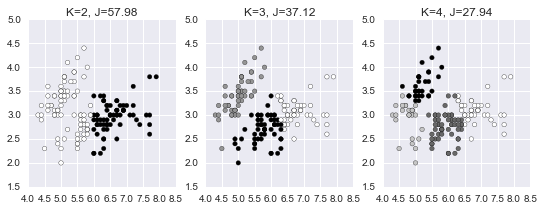

In [18]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2]  # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

## Exercise

### 1. Analyse clusters

- Visually, what would the best value of K ?

- If you consider the inertia $J$ would the best value of K ?

- Explain why such difference

- For $K=2$ why K-means did not found the two "natural" clusters ?
See K-means assumptions: 
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#example-cluster-plot-kmeans-assumptions-py

### 2. Re-implement the K-means algorithm (homework)

Write a function `kmeans(X, k)` that return an interger vector of samples labels

## Ward clustering

Ward clustering belgons to familly of agglomerative hierarchical clustering algorithms. The latter are based on a "bottom up" approach: each sample starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
In Ward clustering where the criterion for choosing the pair of clusters to merge at each step is the minimum variance criterion. Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. This increase is a weighted squared distance between cluster centers.

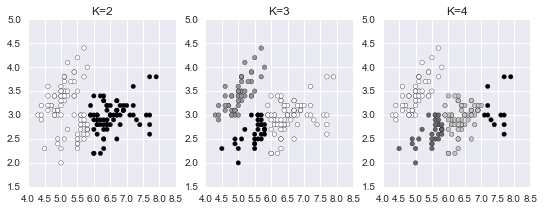

In [19]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color

iris = datasets.load_iris()
X = iris.data[:, :2]# 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target


ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)


plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_)#.astype(np.float))
plt.title("K=4")

# Mahalanobis distance

The Mahalanobis distance is a measure of the distance between a point P and a distribution D, It is a multi-dimensional generalization of the idea of measuring how many standard deviations away P is from the mean of D. This distance is zero if P is at the mean of D, and grows as P moves away from the mean: along each principal component axis, it measures the number of standard deviations from P to the mean of D.

It measures the similarity between point taking account the covariance structure.

## Example

Euclidian dist(m1, x)=2.83 > dist(m1, m2)=2.00
Mahalanobis dist(m1, x)=2.11 < dist(m1, m2)=3.33


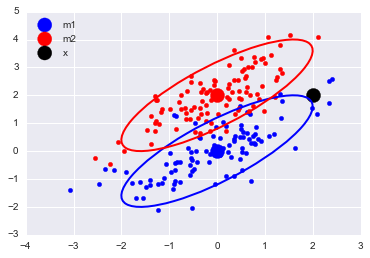

In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

n_samples, n_features = 100, 2
mean1, mean2 = np.array([0, 0]), np.array([0, 2])
Cov = np.array([[1, .8],[.8, 1]])

X1 = np.random.multivariate_normal(mean1, Cov, n_samples)
X2 = np.random.multivariate_normal(mean2, Cov, n_samples)

x = np.array([2, 2])

plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')
plt.scatter(mean1[0], mean1[1], color='b', s=200, label="m1")
plt.scatter(mean2[0], mean2[1], color='r', s=200, label="m2")
plt.scatter(x[0], x[1], color='k', s=200, label="x")
plot_cov_ellipse(Cov, pos=mean1, facecolor='none', linewidth=2, edgecolor='b')
plot_cov_ellipse(Cov, pos=mean2, facecolor='none', linewidth=2, edgecolor='r')
plt.legend(loc='upper left')

#
d2_m1x = scipy.spatial.distance.euclidean(mean1, x)
d2_m1m2 = scipy.spatial.distance.euclidean(mean1, mean2)

Covi = scipy.linalg.inv(Cov)
dm_m1x = scipy.spatial.distance.mahalanobis(mean1, x, Covi)
dm_m1m2 = scipy.spatial.distance.mahalanobis(mean1, mean2, Covi)

print('Euclidian dist(m1, x)=%.2f > dist(m1, m2)=%.2f' % (d2_m1x, d2_m1m2))
print('Mahalanobis dist(m1, x)=%.2f < dist(m1, m2)=%.2f' % (dm_m1x, dm_m1m2))

## Exercice

- Write a function `euclidian(a, b)` that compute the euclidian distance
- Write a function `mahalanobis(a, b, Covi)` that compute the euclidian 
  distance, with the inverse of the covariance matrix. Use `scipy.linalg.inv(Cov)`
  to invert your matrix.

# Gaussian mixture models

Gaussian mixture model as a simple linear superposition of Gaussian components, aimed at providing a rich class of density models. We now turn to a formulation of Gaussian mixtures in terms of discrete latent variables: the $K$ hidden classes to be discovered.

Differences with the K-means:

- Whereas the K-means algorithm performs a hard assignment of data points to clusters, in which each data point is associated uniquely with one cluster, the GMM algorithm makes a soft assignment based on the posterior probabilities. 

- Whereas the classic K-means is only based on Euclidean distance classic GMM use a full Mahalanobis distance that can deall with non spherical distribution. It should be noticed that Mahalanobis could be plugged within a inproved version of K-Means. The Mahalanobis distance is unitless and scale-invariant, and takes into account the correlations of the data set.

The Gaussian mixture distribution can be written as a linear superposition of $K$ Gaussians in the form:

$$
p(x) = \sum_k^K p(k) \mathcal{N}(x|\mu_k, \Sigma_k)
$$

Where:

- $\mathcal{N}(x|\mu_k, \Sigma_k)$ is the multivariate Gaussian distribution defined over a P-dimensional vector $x$ of continuous variables, which is given by

$$
\mathcal{N}(x|\mu_k, \Sigma_k) = \frac{1}{(2\pi)^{P/2}|\Sigma|^{1/2}}\exp\{-\frac{1}{2} (x - \mu)^T \Sigma^{-1}(x - \mu)\}
$$


- The $p(k)$ are the mixing coefficients also know as the class probability of class $k$ that sum to one: $\sum_k^K p(k) =1$.

- $\mathcal{N}(x|\mu_k, \Sigma_k) = p(x|k)$ is conditional distribution of $x$ given a particular class $k$.

The goal is to maximize the log-likelihood of the GMM:

$$
\ln \Pi_i^N \{ \sum_k^K p(k) \mathcal{N}(x|\mu_k, \Sigma_k) \} = \sum_i^N \{ \sum_k^K p(k) \mathcal{N}(x|\mu_k, \Sigma_k) \}
$$

To compute the classes parameters: $p(k), \mu_k, \Sigma_k$ we sum over all samples, by weighting each sample $i$ by its responsibility or contribution to class $k: p(k|x_i)$ such that for each point its contribution to all classes sum to one $\sum_k p(k|x_i) = 1$. This contribution is the conditional probability
of class $k$ given $x$: $p(k|x)$ (sometime called the posterior). It can be computed using Bayes rules:

\begin{align}
p(k|x) &= \frac{p(k) p(x|k)}{p(x)}\\
       &= \frac{p(k) p(x|k)}{p(x)}\\
       &= \frac{p(k) \mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_k^K p(k) \mathcal{N}(x|\mu_k, \Sigma_k)}
\end{align}

Since class parameters ($p(k) \mu_k, \Sigma_k$) depend on responsibilities $p(k|x)$ and responsibilities depend on class parameters we need an two step iterative algorithm: the Expectation Maximization (EM) algorithm:

EM for Gaussian Mixtures
Given a Gaussian mixture model, the goal is to maximize the likelihood function
with respect to the parameters (comprising the means and covariances of the
components and the mixing coefficients).

Initialize the means $\mu_k$ , covariances $\Sigma_k$ and mixing coefficients $ p(k)$ , and
evaluate the initial value of the log likelihood.

1. **E step**. For each sample $i$, evaluate the responsibilities for each class $k$ using the current parameter values

$$
p(k|x_i) = \frac{p(k) \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_k^K p(k) \mathcal{N}(x_i|\mu_k, \Sigma_k)}
$$

2. **M step**. For each class, re-estimate the parameters using the current responsibilities
\begin{align}
\mu_k^{\text{new}}    &= \frac{1}{N_k} \sum_i^N p(k|x_i) x_i\\
\Sigma_k^{\text{new}} &= \frac{1}{N_k} \sum_i^N p(k|x_i) (x_i - \mu_k^{\text{new}}) (x_i - \mu_k^{\text{new}})^T\\
p(k)^{\text{new}}     &= \frac{N_k}{N}
\end{align}

3. Evaluate the log likelihood
$$
\sum_i^N \{ \sum_k^K p(k) \mathcal{N}(x|\mu_k, \Sigma_k) \}
$$
and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 1.

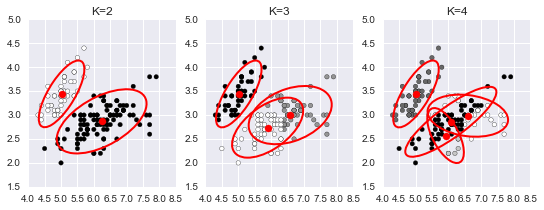

In [21]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
from sklearn import mixture

iris = datasets.load_iris()
X = iris.data[:, :2]# 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target


gmm2 = mixture.GMM(n_components=2, covariance_type='full').fit(X)
gmm3 = mixture.GMM(n_components=3, covariance_type='full').fit(X)
gmm4 = mixture.GMM(n_components=4, covariance_type='full').fit(X)



plt.figure(figsize=(9, 3)) 
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=gmm2.predict(X))
for i in range(gmm2.covars_.shape[0]):
    plot_cov_ellipse(cov=gmm2.covars_[i, :], pos=gmm2.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor='red')
    plt.scatter(gmm2.means_[i, 0], gmm2.means_[i, 1], s=50, color='red')
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=gmm3.predict(X))
for i in range(gmm3.covars_.shape[0]):
    plot_cov_ellipse(cov=gmm3.covars_[i, :], pos=gmm3.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor='red')
    plt.scatter(gmm3.means_[i, 0], gmm3.means_[i, 1], s=50, color='red')
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=gmm4.predict(X))#.astype(np.float))
for i in range(gmm4.covars_.shape[0]):
    plot_cov_ellipse(cov=gmm4.covars_[i, :], pos=gmm4.means_[i, :],
                     facecolor='none', linewidth=2, edgecolor='red')
    plt.scatter(gmm4.means_[i, 0], gmm4.means_[i, 1], s=50, color='red')
plt.title("K=4")